In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
joyo_df = pd.read_csv('data/joyo_kanji.csv',index_col=0)
radicals_df = pd.read_csv('data/kanji_radicals.csv')

%matplotlib inline

In [2]:
print(radicals_df.shape)
print(radicals_df.info())
radicals_df.head()

(214, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    214 non-null    int64 
 1   radical       214 non-null    object
 2   stroke_count  214 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.1+ KB
None


,Unnamed: 0,radical,stroke_count
0,1,一,1
1,2,丨,1
2,3,丶,1
3,4,丿,1
4,5,乙,1


In [3]:
print(joyo_df.shape)
print(joyo_df.info())
joyo_df.head()

(2136, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 1 to 2136
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   new         2136 non-null   object 
 1   old         365 non-null    object 
 2   radical     2136 non-null   object 
 3   strokes     2136 non-null   int64  
 4   grade       2136 non-null   object 
 5   year_added  291 non-null    float64
 6   Unnamed: 7  0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 133.5+ KB
None


,new,old,radical,strokes,grade,year_added,Unnamed: 7
1,亜,亞,二,7,S,NaN,NaN
2,哀,NaN,口,9,S,NaN,NaN
3,挨,NaN,手,10,S,2010.0,NaN
4,愛,NaN,心,13,4,NaN,NaN
5,曖,NaN,日,17,S,2010.0,NaN


## Cleaning
### Jouyou Kanji
The last column of the jouyou kanji dataset has no values.

In [4]:
joyo_df = joyo_df.drop(joyo_df.columns[-1], axis=1)
joyo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 1 to 2136
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   new         2136 non-null   object 
 1   old         365 non-null    object 
 2   radical     2136 non-null   object 
 3   strokes     2136 non-null   int64  
 4   grade       2136 non-null   object 
 5   year_added  291 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 116.8+ KB


Grade should be categorical in the order S,5,4,3,2,1


In [6]:
grades = ['S','6','5','4','3','2','1']
k_grades = pd.CategoricalDtype(categories=grades,ordered=True)
joyo_df.grade = joyo_df.grade.astype(k_grades)
joyo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 1 to 2136
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   new         2136 non-null   object  
 1   old         365 non-null    object  
 2   radical     2136 non-null   object  
 3   strokes     2136 non-null   int64   
 4   grade       2136 non-null   category
 5   year_added  291 non-null    float64 
 6   Unnamed: 7  0 non-null      float64 
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 119.2+ KB


`year_added` is float while it should be integer

In [7]:
joyo_df.year_added = joyo_df.year_added.fillna(0).astype('int64')
joyo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 1 to 2136
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   new         2136 non-null   object  
 1   old         365 non-null    object  
 2   radical     2136 non-null   object  
 3   strokes     2136 non-null   int64   
 4   grade       2136 non-null   category
 5   year_added  2136 non-null   int64   
 6   Unnamed: 7  0 non-null      float64 
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 119.2+ KB


## Exploratory Visualizations

<AxesSubplot:xlabel='grade', ylabel='count'>

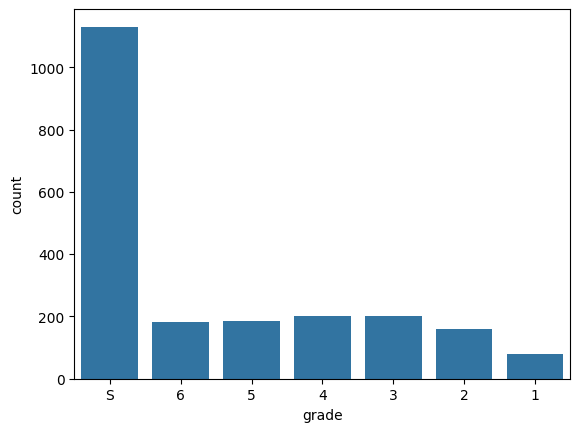

In [8]:
base_color = sb.color_palette()[0]

sb.countplot(data=joyo_df,x='grade',color=base_color)

Looks like a good chunk of kanjis are taught in high school. In elementary school a student is taught about 100-200 kanji depending on your grade, with grades 3,4 having close to 200. 

In [9]:
joyo_df.strokes.describe()

count    2136.000000
mean       10.471442
std         3.796600
min         1.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        29.000000
Name: strokes, dtype: float64

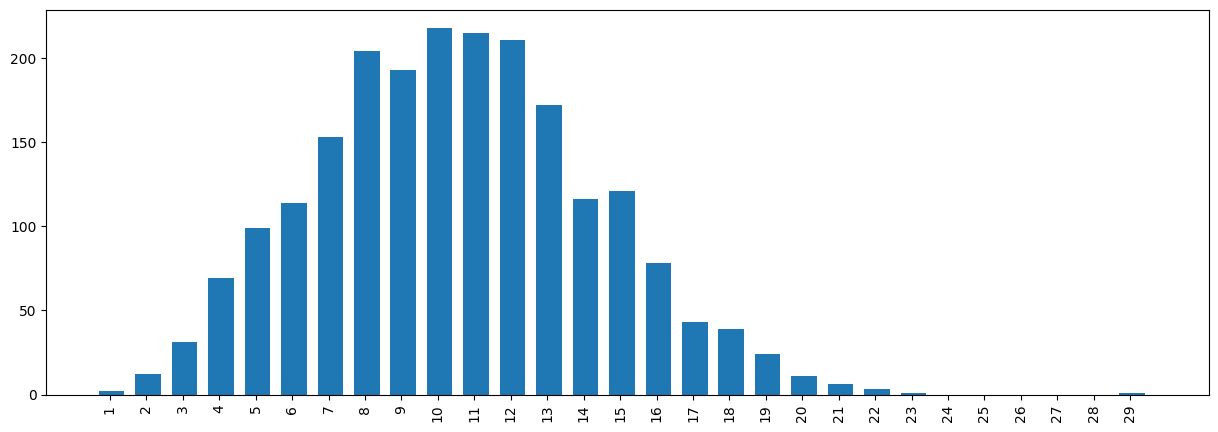

In [10]:
plt.figure(figsize = [15, 5])
bins = np.arange(0.7,joyo_df.strokes.max()+1.7,1)
plt.hist(data=joyo_df,x='strokes',bins=bins, width=0.7)
plt.xticks(np.arange(1,joyo_df.strokes.max()+1,1),rotation=90)
plt.ylabel('Count')
plt.xlabel('Number of Strokes');

The number of strokes are skewed to the left with the majority of kanjis having around 8-12 strokes.

Int64Index([0, 2010, 1981], dtype='int64')

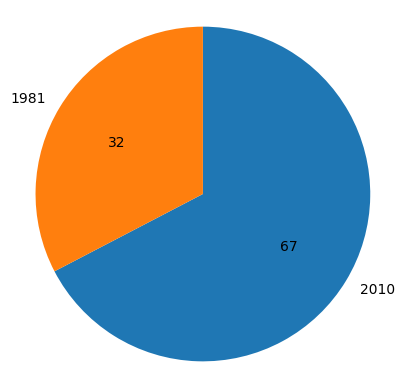

In [17]:
sorted_year_counts = joyo_df.query('year_added>0').year_added.value_counts()

plt.pie(sorted_year_counts,labels=sorted_year_counts.index, startangle=90, counterclock=False,autopct="%d")
plt.axis('square');

Majority of the added kanjis were in 2010.

In [18]:
joyo_df.radical.value_counts()[:20]

水    118
人     98
手     95
木     84
心     76
口     70
言     69
糸     64
辵     51
土     49
艸     47
肉     44
貝     38
宀     37
日     37
女     36
金     33
刀     32
阜     31
竹     25
Name: radical, dtype: int64